In [173]:
# implementing micro grad for training neural networks
import math
import numpy as np
import matplotlib.pyplot as plt

In [174]:
def f(x):
    return 3*(x**2) - 4*(x) + 5

In [175]:
f(3.0)

20.0

In [176]:
xs = np.arange(-5, 5, .25)
xs
ys = f(xs)

In [177]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

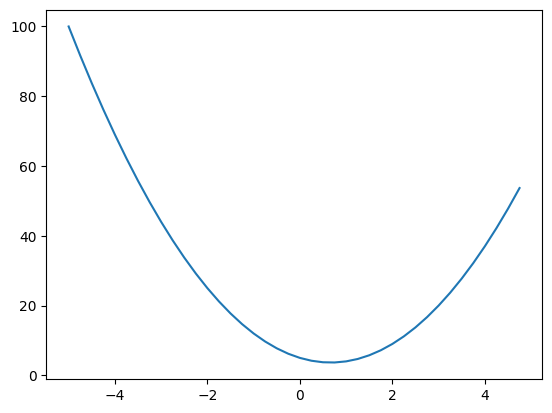

In [178]:
plt.plot(xs, ys)

In [179]:
h = 0.0000000000001
x = 2/3
f(x)

3.666666666666667

In [180]:
(f(x+h) - f(x)) / h

-0.004440892098500626

In [181]:
# more complex example
a = 2.0
b = -3.0
c = 10.0

d = a*b + c
print(d)

4.0


In [182]:
def d(a, b, c):
    return a*b + c

In [183]:
d(a, b, c)

4.0

In [184]:
h = 0.0001
(d(a, b, c+h) - d(a, b, c))/h

0.9999999999976694

In [185]:
def z(a, b, c):
    return a - b - c

In [186]:
z(10,-12, 34)

-12

In [187]:
h = 0.000001
values = [10, -12, 34]
updated_values = [0, 0, 0]
lr = 0000.1
z_val = z(*values)
while z_val < 0:
    for i in range(len(values)) :
        old_result = z(*values)
        old_value = values[i]
        values[i] = values[i] + h
        new_result = z(*values)
        print("The new result is ", new_result)
        derivative_i = (new_result - old_result)/h
        print("The derivative is : ", derivative_i)
        updated_values[i] = old_value + (lr*derivative_i)
        print("The old value is ", old_value, " and the new value is", updated_values[i])
        values[i] = old_value
    values = updated_values.copy()
    updated_values = [0, 0, 0]
    print("The updated values are ", values)
    z_val = z(*values)
    print("The new value of z is ", z_val)

The new result is  -11.999999000000003
The derivative is :  0.9999999974752427
The old value is  10  and the new value is 10.099999999747524
The new result is  -12.000000999999997
The derivative is :  -0.9999999974752427
The old value is  -12  and the new value is -12.099999999747524
The new result is  -12.000000999999997
The derivative is :  -0.9999999974752427
The old value is  34  and the new value is 33.900000000252476
The updated values are  [10.099999999747524, -12.099999999747524, 33.900000000252476]
The new value of z is  -11.700000000757427
The new result is  -11.69999900075743
The derivative is :  0.9999999974752427
The old value is  10.099999999747524  and the new value is 10.199999999495049
The new result is  -11.700001000757425
The derivative is :  -0.9999999974752427
The old value is  -12.099999999747524  and the new value is -12.199999999495049
The new result is  -11.700001000757425
The derivative is :  -0.9999999974752427
The old value is  33.900000000252476  and the ne

In [188]:
# experimenting with chain rule
a = 2.0
b = -3.0
c = 10.0

d = a*b + c
print(d)

4.0


In [189]:
# we will chain another operation to d
e = 12
f = e * d
print(f)

48.0


In [190]:
# how will we find the derivative of f with respect to a ie d_f/d_a
# according to chain rule we would have to find the derivative of f with respect to d and multiply it by the derivative of d with respect to a

# find the derivative of f with respect to d

h = 0.0001
new_f = e * d + h
df_dd = (new_f - f)/h
print(df_dd)

1.0000000000331966


In [191]:
a, b, c, d

(2.0, -3.0, 10.0, 4.0)

In [192]:
new_d = a*b + (c+h)
new_d

4.0001

In [193]:
(new_d - d) / h

0.9999999999976694

In [194]:
# find the derivative of d with respect to a
new_d = (a+h)*b + c
dd_da = (new_d - d)/h
print(dd_da)

-3.000000000010772


In [195]:
# according to chain rule df_da should be df_dd * dd_da
df_da = df_dd * dd_da
print(df_da)

-3.0000000001103615


In [196]:
# creating value object
import math
class Value:
    def __init__(self, data, _children=(), _op=""):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        
    def __str__(self):
        return f"Value(data={self.data})"
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        result = other.data + self.data
        out = Value(result, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        result = self.data * other.data
        out = Value(result, (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        return self * (other**-1)
    
    def __floordiv__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        result = self.data / other.data
        return Value(result, (self, other), "/")
    
    def __mod__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        result = self.data % other.data
        return Value(result, (self, other), "%")
    
    def __pow__(self, other):
        assert isinstance(other, (int, float))
        result = self.data ** other
        out = Value(result, (self,), f"** {other}")
        
        def _backward():
            self.grad += (other*(self.data**(other-1))) * out.grad
        
        out._backward = _backward
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        other = Value(t, (self,), "tanh")
        def _backward():
            self.grad += (1 - t**2) * other.grad
        other._backward = _backward
        return other
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp")
        
        def _backward():
            self.grad += out.data * out.grad
        
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        self.grad = 1
        build_topo(self)
        for node in reversed(topo):
            node._backward()
        
    
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.88137)

x1w1 = x1 * w1
x2w2 = x2 * w2

x1w1x2w2 = x1w1 + x2w2
n = x1w1x2w2 + b
o = n.tanh()

In [197]:
o.grad

0

In [198]:
o.backward()

In [199]:
o.grad

1

In [200]:
n.grad

0.5000025364090595

In [201]:
x1.grad

-1.5000076092271784

In [202]:
w1.grad

1.000005072818119

In [203]:
w2.grad

0.0

In [204]:
d.grad

AttributeError: 'float' object has no attribute 'grad'

In [ ]:
c.grad

1.0

In [ ]:
a.grad

-3.0

In [ ]:
b.grad

2.0

In [ ]:
d._op

'+'

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [ ]:
c = a + b
c

Value(data=-1.0)

In [ ]:
c*a

Value(data=20.0)

In [ ]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ data %.4f}" % (n.data,), shape="record")
        if n._op:
            dot.node(name=uid+n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
e = a * b 
d = e + c
f = Value(-2.0)
L = d * f   
L

Value(data=-8.0)

In [ ]:
L.grad = 1.00
d.grad = -2.00
f.grad = 4.00
c.grad = -2.00
e.grad = -2.00
a.grad = 6.00
b.grad = -4.00


In [ ]:
a.data += a.grad
b.data += b.grad
c.data += c.grad
f.data += f.grad

e = a * b
d = e + c
L = d + f
L

Value(data=2.0)

In [ ]:
def lol():
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a * b 
    d = e + c
    f = Value(-2.0)
    L = d * f    
    L1 = L
    
    h = 0.0001
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a * b 
    d = e + c
    f = Value(-2.0+h)
    L = (d) * f    
    L2 = L
    
    print(L1)
    print(L2)
    derivative = (L2.data-L1.data)/h
    
    print(derivative)
    
lol()
    

Value(data=-8.0)
Value(data=-7.9996)
3.9999999999995595


In [ ]:
four = Value(4)
two = Value(2)

four/two

Value(data=2.0)

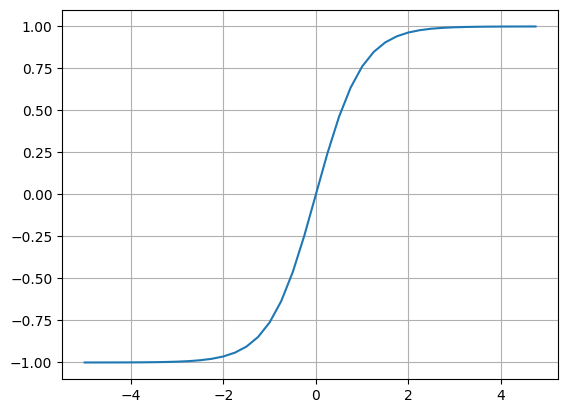

In [ ]:
plt.plot(np.arange(-5, 5, .25), np.tanh(np.arange(-5, 5, .25))); plt.grid()

In [ ]:
def Neuron(x1, x2, w1, w2):
    pass

x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.88137)

x1w1 = x1 * w1
x2w2 = x2 * w2

x1w1x2w2 = x1w1 + x2w2
n = x1w1x2w2 + b
o = n.tanh()

o

The value of n is  0.8813700000000004


Value(data=0.7071049876722272)

In [ ]:
o.grad =1.0

In [ ]:
o.grad

1.0

In [ ]:
o._backward()

In [ ]:
n.grad

0

In [ ]:
# start backward propagation
o.grad = 1

In [ ]:

# find do/dn
def run():
    h = 0.0001
    x1 = Value(2.0)
    x2 = Value(0.0)
    w1 = Value(-3.0)
    w2 = Value(1.0)
    b = Value(6.88137)

    x1w1 = x1 * w1
    x2w2 = x2 * w2

    x1w1x2w2 = x1w1 + x2w2
    n = x1w1x2w2 + b + Value(h)
    new_o = n.tanh()
    n_grad = (new_o - o)/Value(h)
    print(n_grad)

Value(data=0.49996718181288813)

In [ ]:
n.grad = 0.5
n.grad

0.5

In [ ]:
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x1.grad = -1.5
w1.grad = 1
x2.grad = 0.5
w2.grad = 0

In [ ]:
import torch

In [ ]:
# automatically performing backpropagation\
import torch

x1 = torch.tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.tensor([0.0]).double() ; x2.requires_grad = True
w1 = torch.tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.tensor([1.0]).double() ; w2.requires_grad = True

b = torch.tensor([6.88137]).double() ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.item())

o.backward()

print("__________________")
print("Gradient of x1 is : ", x1.grad.item())
print("Gradient of x2 is : ", x2.grad.item())
print("Gradient of w1 is : ", w1.grad.item())
print("Gradient of w2 is : ", w2.grad.item())

0.7071050214706146
__________________
Gradient of x1 is :  -1.500007465833125
Gradient of x2 is :  0.5000024886110417
Gradient of w1 is :  1.0000049772220834
Gradient of w2 is :  0.0


In [209]:
import numpy as np

class Neuron:
    def __init__(self, nin) -> None:
        self.w = [Value(np.random.uniform(-1, 1)) for i in range(nin)]
        self.b = Value(np.random.uniform(-1, 1))
        
    def __call__(self, x):
        sum = Value(0)
        print("The input x is ", x)
        print("The weights w is :", self.w)
        assert len(x) == len(self.w)
        for i in range(len(x)):
            sum += x[i] * self.w[i]
        result = sum + b
        out = result.tanh()
        return out
    def params(self):
        params = []
        params.extend(self.w)
        params.append(self.b)
        
        return params
    
x = [2.0, 3.0]
n = Neuron(2)
n(x)

The input x is  [2.0, 3.0]
The weights w is : [Value(data=0.8057636319158743), Value(data=0.3585842651274225)]


Value(data=0.9999999902319887)

In [210]:
class Layer:
    def __init__(self, nin, nout):
        self.nin = nin
        self.nout = nout
        self.neurons = [Neuron(nin) for n in range(nout)]
        
    def __call__(self, x):
        outputs = [neuron(x) for neuron in self.neurons]
        return outputs[0] if len(outputs) == 1 else outputs
    
    def params(self):
        params = []
        for neuron in self.neurons:
            params.extend(neuron.params())
        return params

In [211]:
class MLP:
    def __init__(self, nin, nout):
        self.layers = [Layer(nin, nout)]
        self.nout = nout
        
    def create_layer(self, nout):
        new_layer = Layer(self.nout, nout)
        self.layers.append(new_layer)
        self.nout = nout
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.nout = layer.nout
        
    def params(self):
        params = []
        for layer in self.layers:
            params.extend(layer.params())
        return params
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [212]:
x = [2.0, 3.0, -1]

mlp = MLP(3, 4)
mlp.create_layer(4)
l = Layer(4, 1)
mlp.add_layer(l)
mlp(x)

The input x is  [2.0, 3.0, -1]
The weights w is : [Value(data=-0.06809826215473569), Value(data=0.5968120836349755), Value(data=-0.8003623594824254)]
The input x is  [2.0, 3.0, -1]
The weights w is : [Value(data=0.5400368180323456), Value(data=0.5488840678275111), Value(data=0.00832095933904431)]
The input x is  [2.0, 3.0, -1]
The weights w is : [Value(data=0.9348307924758563), Value(data=0.05075789247705553), Value(data=-0.11505211855162756)]
The input x is  [2.0, 3.0, -1]
The weights w is : [Value(data=-0.9129194278508672), Value(data=0.9217304583564536), Value(data=0.9138341756064088)]
The input x is  [Value(data=0.9999999844436512), Value(data=0.9999999908215049), Value(data=0.9999999706380904), Value(data=0.999997996531258)]
The weights w is : [Value(data=0.42686828230929685), Value(data=0.37263412554929976), Value(data=0.2807076550453198), Value(data=0.5883736022378641)]
The input x is  [Value(data=0.9999999844436512), Value(data=0.9999999908215049), Value(data=0.9999999706380904

Value(data=0.9998489112264942)

In [213]:
# create sample data for the neural network
xs = [[2.0, 3.0, -1.0],
      [3.0, -1.0, 0.5],
      [0.5, 1.0, 1.0],
      [1.0, 1.0, -1.0],]

ys = [1.0, -1.0, -1.0, 1.0]

y_predictions = [mlp(x) for x in xs]
y_predictions

The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=-0.06809826215473569), Value(data=0.5968120836349755), Value(data=-0.8003623594824254)]
The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=0.5400368180323456), Value(data=0.5488840678275111), Value(data=0.00832095933904431)]
The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=0.9348307924758563), Value(data=0.05075789247705553), Value(data=-0.11505211855162756)]
The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=-0.9129194278508672), Value(data=0.9217304583564536), Value(data=0.9138341756064088)]
The input x is  [Value(data=0.9999999844436512), Value(data=0.9999999908215049), Value(data=0.9999999706380904), Value(data=0.999997996531258)]
The weights w is : [Value(data=0.42686828230929685), Value(data=0.37263412554929976), Value(data=0.2807076550453198), Value(data=0.5883736022378641)]
The input x is  [Value(data=0.9999999844436512), Value(data=0.9999999908215049), Value(data=0.99999997

[Value(data=0.9998489112264942),
 Value(data=0.9998489112566749),
 Value(data=0.9998489112261761),
 Value(data=0.9998489112267275)]

In [214]:
# define the loss function
def mse(y, y_pred):
    assert len(y) == len(y_pred)
    total = Value(0.00)
    for i in range(len(y)):
        diff = (Value(y[i]) - y_pred[i])**2
        total += diff
    return total

loss = mse(ys, y_predictions)
loss

Value(data=7.998791381242664)

In [215]:
loss.grad

0

In [216]:
loss.backward()

In [217]:
loss.grad

1

In [218]:
mlp.layers[0].neurons[0].w[0].grad

3.278385384799061e-11

In [219]:
mlp.params()

[Value(data=-0.06809826215473569),
 Value(data=0.5968120836349755),
 Value(data=-0.8003623594824254),
 Value(data=0.8427328935135907),
 Value(data=0.5400368180323456),
 Value(data=0.5488840678275111),
 Value(data=0.00832095933904431),
 Value(data=0.7421769143889381),
 Value(data=0.9348307924758563),
 Value(data=0.05075789247705553),
 Value(data=-0.11505211855162756),
 Value(data=0.6346601910759628),
 Value(data=-0.9129194278508672),
 Value(data=0.9217304583564536),
 Value(data=0.9138341756064088),
 Value(data=-0.932229476885317),
 Value(data=0.42686828230929685),
 Value(data=0.37263412554929976),
 Value(data=0.2807076550453198),
 Value(data=0.5883736022378641),
 Value(data=-0.6400393403993727),
 Value(data=0.33318811213866306),
 Value(data=-0.5564969803576354),
 Value(data=-0.41925281440020945),
 Value(data=-0.6130629899051594),
 Value(data=0.5644981903896289),
 Value(data=0.3321271659037017),
 Value(data=0.7305214011114085),
 Value(data=-0.9241672542459689),
 Value(data=-0.31778043193

In [220]:
def zero_grad(parameters):
    for p in parameters:
        p.grad = 0

In [221]:
def optimize(lr, parameters):
    zero_grad(parameters)
    for p in parameters:
        print("P data is ", p.data)
        p.data += -lr * p.grad
        print("New P data is ", p.data)

In [222]:
def compute(model, xs):
    y_predictions = [model(x) for x in xs]
    return y_predictions

In [228]:
loss = mse(ys, compute(mlp, xs))
loss

The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=-0.06809826215473569), Value(data=0.5968120836349755), Value(data=-0.8003623594824254)]
The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=0.5400368180323456), Value(data=0.5488840678275111), Value(data=0.00832095933904431)]
The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=0.9348307924758563), Value(data=0.05075789247705553), Value(data=-0.11505211855162756)]
The input x is  [2.0, 3.0, -1.0]
The weights w is : [Value(data=-0.9129194278508672), Value(data=0.9217304583564536), Value(data=0.9138341756064088)]
The input x is  [Value(data=0.9999999844436512), Value(data=0.9999999908215049), Value(data=0.9999999706380904), Value(data=0.999997996531258)]
The weights w is : [Value(data=0.42686828230929685), Value(data=0.37263412554929976), Value(data=0.2807076550453198), Value(data=0.5883736022378641)]
The input x is  [Value(data=0.9999999844436512), Value(data=0.9999999908215049), Value(data=0.99999997

Value(data=7.998791381242664)

In [226]:
loss.backward()

In [227]:
optimize(1, mlp.params())

P data is  -0.06809826215473569
New P data is  -0.06809826215473569
P data is  0.5968120836349755
New P data is  0.5968120836349755
P data is  -0.8003623594824254
New P data is  -0.8003623594824254
P data is  0.8427328935135907
New P data is  0.8427328935135907
P data is  0.5400368180323456
New P data is  0.5400368180323456
P data is  0.5488840678275111
New P data is  0.5488840678275111
P data is  0.00832095933904431
New P data is  0.00832095933904431
P data is  0.7421769143889381
New P data is  0.7421769143889381
P data is  0.9348307924758563
New P data is  0.9348307924758563
P data is  0.05075789247705553
New P data is  0.05075789247705553
P data is  -0.11505211855162756
New P data is  -0.11505211855162756
P data is  0.6346601910759628
New P data is  0.6346601910759628
P data is  -0.9129194278508672
New P data is  -0.9129194278508672
P data is  0.9217304583564536
New P data is  0.9217304583564536
P data is  0.9138341756064088
New P data is  0.9138341756064088
P data is  -0.9322294768